In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
from matplotlib.image import imread
import anndata as ad
from scipy.stats import pearsonr

from PIL import Image
Image.MAX_IMAGE_PIXELS = None

## ST-ConMa

In [ ]:
# Paths
RESULT_DIR = '../../results/gep_pred/st_conma_igc_igm/heg/cscc'
DATA_DIR = '../../ft_dataset/gep_pred/cscc'

SAMPLE = 'P2_ST_rep1'
PATIENT = 'P2'
GENE = 'LGALS1'

# Load pred / true
pred = np.load(f'{RESULT_DIR}/patient_{PATIENT}_samples/{SAMPLE}_pred.npy')
true = np.load(f'{RESULT_DIR}/patient_{PATIENT}_samples/{SAMPLE}_true.npy')

# Load gene names from normalized counts
cnt_df = pd.read_csv(f'{DATA_DIR}/ST-cnts-normalized/{SAMPLE}.tsv', sep='\t', index_col=0)
gene_names = cnt_df.columns.tolist()
spot_ids = cnt_df.index.tolist()

# Load spot coordinates
spot_df = pd.read_csv(f'{DATA_DIR}/ST-spotfiles/{SAMPLE}.tsv', sep='\t')

# Tissue image
img_path = f'{DATA_DIR}/ST-imgs/{SAMPLE}/GSM4284316_P2_ST_rep1.jpg'
img = imread(img_path)

print(f'pred: {pred.shape}, true: {true.shape}, genes: {len(gene_names)}, spots: {len(spot_ids)}, spot_df: {spot_df.shape[0]}')
print(f'{GENE} index: {gene_names.index(GENE)}')

pred: (666, 250), true: (666, 250), genes: 250, spots: 1933, spot_df: 666
LGALS1 index: 212


In [45]:
# Get SDC1 values
gene_idx = gene_names.index(GENE)
true_gene = true[:, gene_idx]
pred_gene = pred[:, gene_idx]

n_spots = pred.shape[0]

# Build AnnData for ground truth
adata_true = ad.AnnData(
    X=true_gene.reshape(-1, 1),
    obs=pd.DataFrame(index=[str(i) for i in range(n_spots)]),
)
adata_true.var_names = [GENE]

# Build AnnData for prediction
adata_pred = ad.AnnData(
    X=pred_gene.reshape(-1, 1),
    obs=pd.DataFrame(index=[str(i) for i in range(n_spots)]),
)
adata_pred.var_names = [GENE]

# Set spatial coordinates and tissue image
spatial_key = f'{SAMPLE}_image'
for adata in [adata_true, adata_pred]:
    adata.obsm['spatial'] = spot_df[['pixel_x', 'pixel_y']].values
    adata.uns['spatial'] = {
        spatial_key: {
            'images': {'hires': img},
            'scalefactors': {
                'tissue_hires_scalef': 1.0,
                'spot_diameter_fullres': 150.0,
            },
        }
    }

print('AnnData ready:', adata_true.shape, adata_pred.shape)

AnnData ready: (666, 1) (666, 1)


/tmp/ipykernel_759600/2889919823.py:4: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(
/tmp/ipykernel_759600/2889919823.py:10: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(


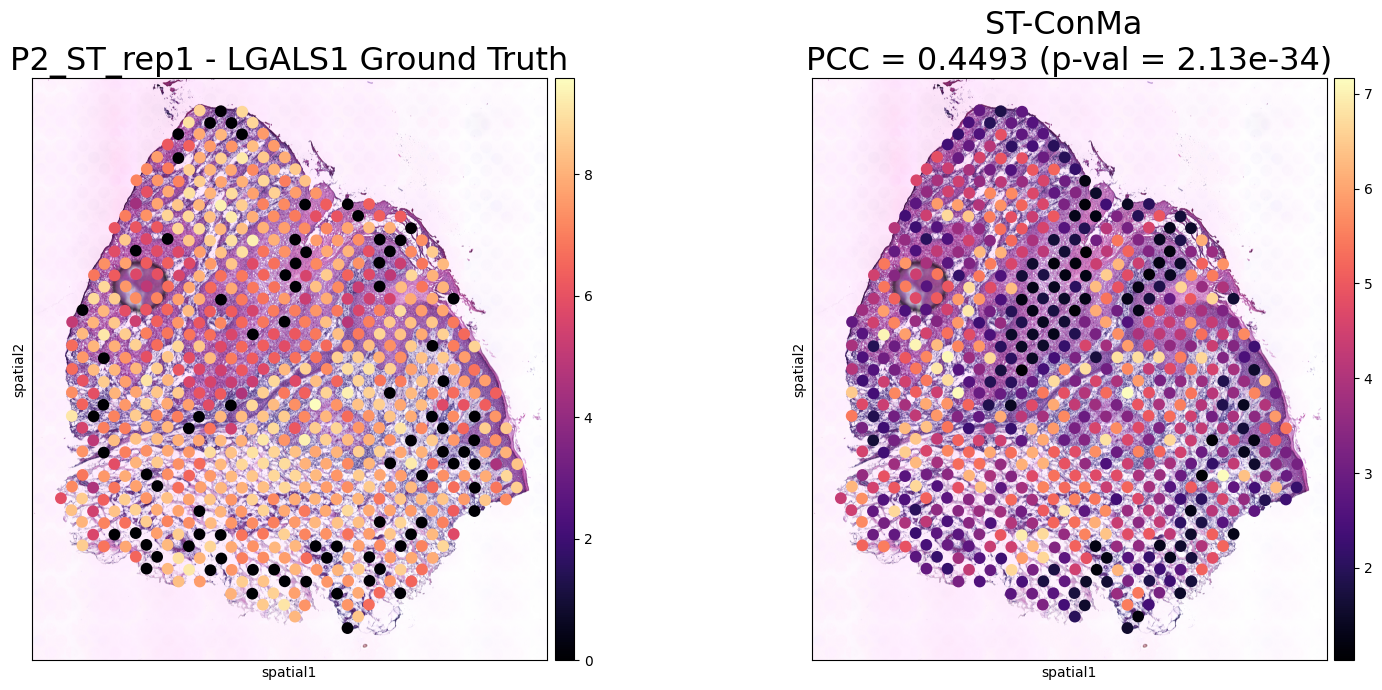

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
pcc, pval = pearsonr(true_gene, pred_gene)

sc.pl.spatial(
    adata_true, color=GENE, library_id=spatial_key,
    img_key='hires', spot_size=200, title=f'{SAMPLE} - {GENE} Ground Truth',
    color_map='magma', show=False, ax=axes[0],
)

sc.pl.spatial(
    adata_pred, color=GENE, library_id=spatial_key,
    img_key='hires', spot_size=200, title=f'ST-ConMa \nPCC = {pcc:.4f} (p-val = {pval:.2e})',
    color_map='magma', show=False, ax=axes[1],
)
# Bigger titles
for ax in axes:
    ax.set_title(ax.get_title(), fontsize=23)


plt.tight_layout()
plt.show()

## ST_ConMa (Zero-shot)

In [ ]:
# Paths
RESULT_DIR = '../../results/gep_pred/st_conma_zeroshot/heg/cscc'

# Load pred / true
pred = np.load(f'{RESULT_DIR}/patient_{PATIENT}_samples/{SAMPLE}_pred.npy')
true = np.load(f'{RESULT_DIR}/patient_{PATIENT}_samples/{SAMPLE}_true.npy')

In [51]:
# Get CD24 values
gene_idx = gene_names.index(GENE)
true_gene = true[:, gene_idx]
pred_gene = pred[:, gene_idx]

# Build AnnData for ground truth
adata_true = ad.AnnData(
    X=true_gene.reshape(-1, 1),
    obs=pd.DataFrame(index=[str(i) for i in range(n_spots)]),
)
adata_true.var_names = [GENE]

# Build AnnData for prediction
adata_pred = ad.AnnData(
    X=pred_gene.reshape(-1, 1),
    obs=pd.DataFrame(index=[str(i) for i in range(n_spots)]),
)
adata_pred.var_names = [GENE]

# Set spatial coordinates and tissue image
spatial_key = f'{SAMPLE}_image'
for adata in [adata_true, adata_pred]:
    adata.obsm['spatial'] = spot_df[['pixel_x', 'pixel_y']].values
    adata.uns['spatial'] = {
        spatial_key: {
            'images': {'hires': img},
            'scalefactors': {
                'tissue_hires_scalef': 1.0,
                'spot_diameter_fullres': 150.0,
            },
        }
    }

print('AnnData ready:', adata_true.shape, adata_pred.shape)

AnnData ready: (666, 1) (666, 1)


/tmp/ipykernel_759600/4225233018.py:4: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(
/tmp/ipykernel_759600/4225233018.py:10: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(


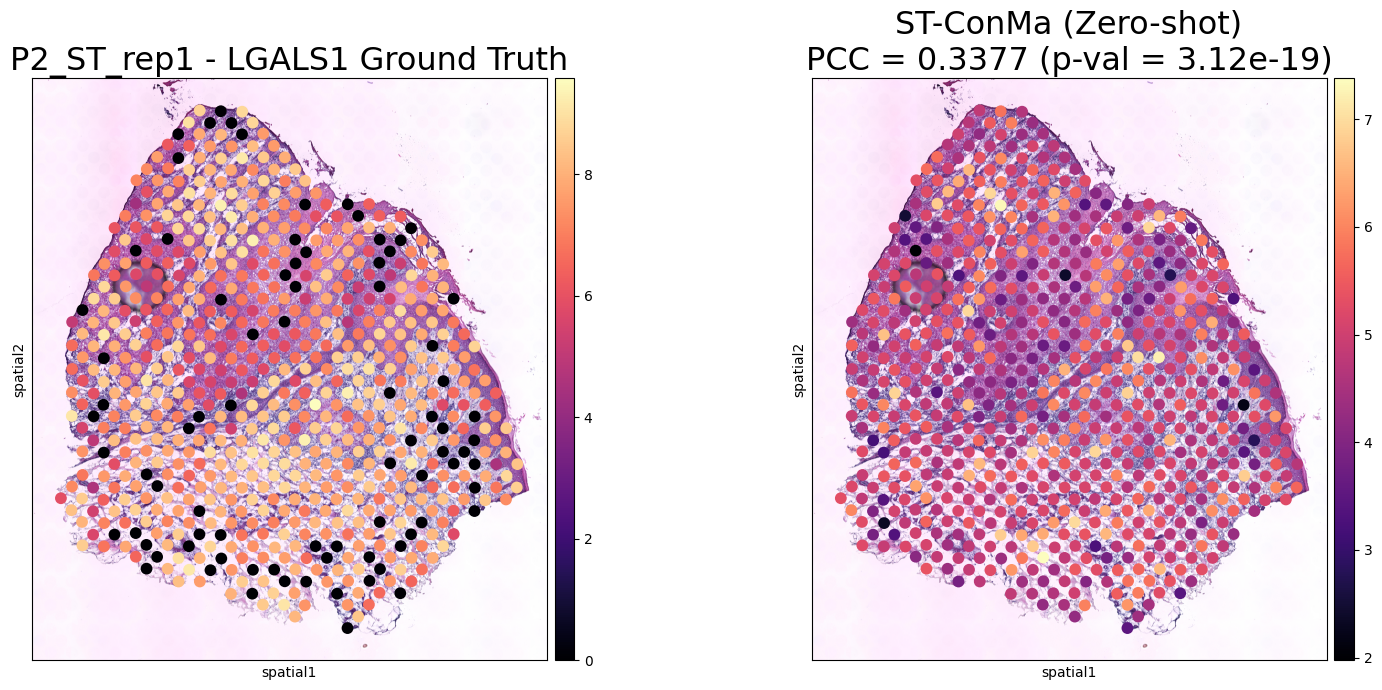

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
pcc, pval = pearsonr(true_gene, pred_gene)

sc.pl.spatial(
    adata_true, color=GENE, library_id=spatial_key,
    img_key='hires', spot_size=200, title=f'{SAMPLE} - {GENE} Ground Truth',
    color_map='magma', show=False, ax=axes[0],
)

sc.pl.spatial(
    adata_pred, color=GENE, library_id=spatial_key,
    img_key='hires', spot_size=200, title=f'ST-ConMa (Zero-shot)\nPCC = {pcc:.4f} (p-val = {pval:.2e})',
    color_map='magma', show=False, ax=axes[1],
)
# Bigger titles
for ax in axes:
    ax.set_title(ax.get_title(), fontsize=23)


plt.tight_layout()
plt.show()